In [1]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import re

In [2]:
from nltk.corpus import stopwords # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words # Get all words in english language

import textblob
from textblob import TextBlob

from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMOJI # For emojis

import string
import warnings

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cheesom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cheesom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
import string

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cheesom\AppData\Roaming\nltk_data...


True

In [8]:
# Access keys and tokens from Twitter Developer Account
# These are hidden to comply with Twitter's API terms and conditions
# You'll need to get a Twitter developer Account to get your own keys to use for this part.
consumer_key = '_________________________'
consumer_secret = '_________________________'
access_token = '_________________________'
access_secret = '_________________________'

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #Pass in Consumer key and secret for authentication by API
auth.set_access_token (access_token, access_secret) # Pass in Access token and secret for authentication by API
api = tweepy.API(auth, wait_on_rate_limit = True) #sleeps when API limit is reached

# GATHERING DATA

### ATIKU ABUBAKAR

In [53]:
#create keywords to search for , filter links, retweets, replies
search_words = "#okowa OR #atikuokowa2023 OR #atiku"
search_query = search_words + "-filter:retweets AND -filter:replies"

In [54]:
# specifying limit of 1,000,000 tweets
# I prefer to gather tweets in batches then append, due to twitter's tweet request limitation
limit=1000000

# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

In [55]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id,tweet.user.screen_name,tweet.created_at,tweet.full_text,tweet.user.location,tweet.retweet_count,tweet.favorite_count,tweet.user.followers_count,tweet.user.friends_count,tweet.user.verified,tweet.source])

In [56]:
# creating a dataframe
df_aa = pd.DataFrame(data, columns=columns)

# cheking the number of rows and columns
df_aa.shape

(1389, 11)

In [57]:
df_aa.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
0,1585929663901478917,KingsleyNjomi1,2022-10-28 09:41:11+00:00,This man @renoomokri are you a politician? Of ...,,0,0,55,255,False,Twitter for Android
1,1585929369843036160,OndoPDPVanguard,2022-10-28 09:40:01+00:00,Highlights of Ondo PDP Presidential Campaign C...,Ondo Nigeria,0,0,326,332,False,Twitter for iPhone
2,1585928744769814529,Getit4me44,2022-10-28 09:37:32+00:00,Elon Musk Officially takeover Twitter https://...,Nigeria,2,2,12,114,False,Twitter for Android
3,1585928287481495553,theallnigerian,2022-10-28 09:35:43+00:00,Kindly help in filling this survey. Thank you ...,"lagos, nigeria",1,1,1255,1284,False,Twitter for iPhone
4,1585924498527727616,Zulzurander,2022-10-28 09:20:40+00:00,Also Aminu waziri is what @Benzema is to footb...,9th Realm,1,0,3789,3239,False,Twitter for Android


In [58]:
df_aa.tail()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
1384,1582669654475931648,AyotundeJames3,2022-10-19 09:47:04+00:00,"Atiku's UNITY-SEED agenda is the best, most co...",,3,8,101,216,False,Twitter for Android
1385,1582669474410688515,AbdulfataiHuss2,2022-10-19 09:46:21+00:00,I am so glad Nigeria will be great again.....A...,Abuja,0,0,82,156,False,Twitter Web App
1386,1582668563315589121,Scentfrankie,2022-10-19 09:42:44+00:00,"We are watching. So very easy to say, for some...",,1,1,131,113,False,Twitter for Android
1387,1582667738551816193,DebbieDebbie174,2022-10-19 09:39:28+00:00,National Unity can be achieved if every sectio...,,10,22,154,297,False,Twitter for Android
1388,1582667403284316161,Scentfrankie,2022-10-19 09:38:08+00:00,🤣🤣🤣 ... I can't stop laughing\n#NigeriaGetYour...,,1,1,131,113,False,Twitter for Android


In [63]:
# saving dataframe to a csv file
df_aa.to_csv('atiku19Oct-28Oct(09_38_08am_to_09_41_11am).csv')

### Bola Ahmed Tinubu

In [ ]:
#create keywords to search for , filter links, retweets, replies
search_words = "#bat2023 OR #bolaahmedtinubu OR #tinubu OR #emilokan"
search_query = search_words + "-filter:retweets AND -filter:replies"

In [ ]:
# specifying limit of 1,000,000 tweets
# I prefer to gather tweets in batches then append, due to twitter's tweet request limitation
limit=1000000

# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

In [ ]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id,tweet.user.screen_name,tweet.created_at,tweet.full_text,tweet.user.location,tweet.retweet_count,tweet.favorite_count,tweet.user.followers_count,tweet.user.friends_count,tweet.user.verified,tweet.source])

In [ ]:
# creating a dataframe
df_bat = pd.DataFrame(data, columns=columns)

# cheking the number of rows and columns
df_bat.shape

In [ ]:
df_bat.head()

In [ ]:
df_bat.tail()

In [ ]:
# saving dataframe to a csv file
df_bat.to_csv('tinubu19Oct-28Oct(09_42_11am_to_09_37_32am).csv')

### Peter Obi

In [ ]:
#create keywords to search for , filter links, retweets, replies
search_words = "#obidients OR #obidientlyyusuful OR obidatti2023 OR #obidient"
search_query = search_words + "-filter:retweets AND -filter:replies"

In [ ]:
# specifying limit of 1,000,000 tweets
# I prefer to gather tweets in batches then append, due to twitter's tweet request limitation
limit=1000000

# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

In [ ]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id,tweet.user.screen_name,tweet.created_at,tweet.full_text,tweet.user.location,tweet.retweet_count,tweet.favorite_count,tweet.user.followers_count,tweet.user.friends_count,tweet.user.verified,tweet.source])

In [ ]:
# creating a dataframe
df_obi = pd.DataFrame(data, columns=columns)

# cheking the number of rows and columns
df_obi.shape

In [ ]:
df_obi.head()

In [ ]:
df_obi.tail()

In [ ]:
# saving dataframe to a csv file
df_obi.to_csv('peterobi19Oct-28Oct(09_30_46am_to_09_33_38am).csv')

## DATA CLEANING

In [61]:
df_aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             1389 non-null   int64              
 1   username       1389 non-null   object             
 2   time_of_tweet  1389 non-null   datetime64[ns, UTC]
 3   tweet          1389 non-null   object             
 4   location       1389 non-null   object             
 5   retweets       1389 non-null   int64              
 6   likes          1389 non-null   int64              
 7   followers      1389 non-null   int64              
 8   following      1389 non-null   int64              
 9   verified       1389 non-null   bool               
 10  tweet_source   1389 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 110.0+ KB


In [62]:
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             1657 non-null   int64              
 1   username       1657 non-null   object             
 2   time_of_tweet  1657 non-null   datetime64[ns, UTC]
 3   tweet          1657 non-null   object             
 4   location       1657 non-null   object             
 5   retweets       1657 non-null   int64              
 6   likes          1657 non-null   int64              
 7   followers      1657 non-null   int64              
 8   following      1657 non-null   int64              
 9   verified       1657 non-null   bool               
 10  tweet_source   1657 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 131.2+ KB


In [60]:
df_obi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4731 entries, 0 to 4730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             4731 non-null   int64              
 1   username       4731 non-null   object             
 2   time_of_tweet  4731 non-null   datetime64[ns, UTC]
 3   tweet          4731 non-null   object             
 4   location       4731 non-null   object             
 5   retweets       4731 non-null   int64              
 6   likes          4731 non-null   int64              
 7   followers      4731 non-null   int64              
 8   following      4731 non-null   int64              
 9   verified       4731 non-null   bool               
 10  tweet_source   4731 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 374.4+ KB


## DATA ASSESSMENTS

The only data issue (I expected more) I observed is:
* Missing location values (quality issue)

## DATA CLEANING

The dataframes are cleaned here. Just basically filling the empty locations with 'NA'.

#### Copies of the dataframes made before cleaning

In [74]:
aa_df=df_aa.copy()
bat_df=df_bat.copy()
obi_df=df_obi.copy()

### Reading the dataframes

In [4]:
aa_df=pd.read_csv('atiku19Oct-28Oct(09_38_08am_to_09_41_11am).csv')
bat_df=pd.read_csv('tinubu19Oct-28Oct(09_42_11am_to_09_37_32am).csv')
obi_df=pd.read_csv('peterobi19Oct-28Oct(09_30_46am_to_09_33_38am).csv')

### ATIKU

In [5]:
def getHashtags(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [6]:
aa_df['hashtags']=aa_df['tweet'].apply(getHashtags)

In [7]:
# Store hashtags in a list
hashtags_list=aa_df['hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Importing Collection module to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts=Counter(hashtags)
hashtags_df=pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns=['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  916


In [8]:
hashtags_df.head(10)

,hashtags,count
1,#atikuokowa2023,1025
0,#atiku,381
22,#atikukawai,225
94,#atikuinedo,138
14,#tinubu,129
33,#pdp,102
17,#peterobi,102
104,#atikuokowa,80
63,#pdprecoveryplan,62
583,#atikuokowainedo,56


In [9]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets

In [10]:
emojis = list(UNICODE_EMOJI.keys())

In [11]:
# preProcess tweet for sentiment analysis
def preprocessTweets(tweet):
    tweet = tweet.lower()
    # Cleaning and removing URL’s
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)
    # Cleaning and removing repeating characters
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '',  tweet)
    # Cleaning and removing the above stop words list from the tweet text
    tweet_tokens = word_tokenize(tweet)  
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    # Cleaning and removing punctuations
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

In [12]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
aa_df['Processed_Tweets']=aa_df['tweet'].apply(preprocessTweets)

In [13]:
# Define function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Define function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [14]:
# Apply the functions to respective columns
aa_df['Polarity']=aa_df['Processed_Tweets'].apply(getPolarity)
aa_df['Sentiment']=aa_df['Polarity'].apply(getSentimentTextBlob)

In [15]:
data=aa_df['Sentiment'].value_counts()

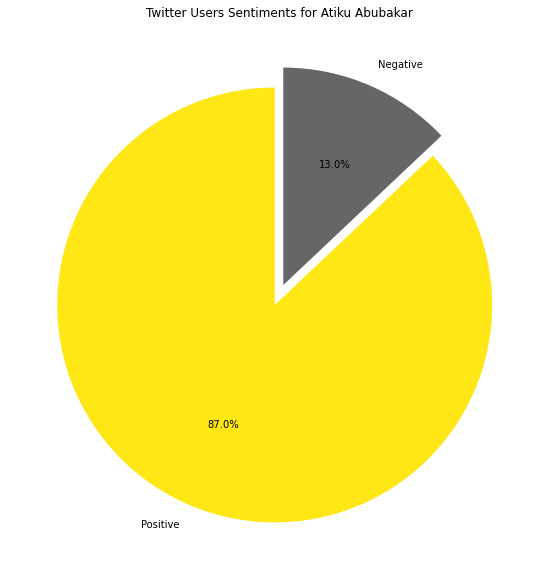

In [16]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(data, labels=['Positive', 'Negative'], colors=['#FEE715', '#666666'], startangle=90, explode= [0.05, 0.05], autopct='%1.1f%%');
plt.title('Twitter Users Sentiments for Atiku Abubakar');

### Bola Ahmed Tinubu

In [17]:
bat_df['hashtags']=bat_df['tweet'].apply(getHashtags)
bat_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags
0,0,1585928744769814529,Getit4me44,2022-10-28 09:37:32+00:00,Elon Musk Officially takeover Twitter https://...,Nigeria,2,2,12,114,False,Twitter for Android,#imrankhanpti #ispr #elonmusk #babarazam𓃵 #دور...
1,1,1585927275576336384,SWEEPITCLEANMVT,2022-10-28 09:31:42+00:00,I am a serious man with a serious purpose. I a...,"Abuja, Nigeria",0,1,15,92,False,Twitter for Android,#elonmusk #pakistancricket #batksm2023 #bat2023
2,2,1585916514825162752,Mario9jaa,2022-10-28 08:48:56+00:00,"Akoni Obinrin Osun, the Women Campaign Group f...",Somewhere safe.,7,15,10840,9814,False,Twitter for iPhone,#bat2023
3,3,1585913252768231424,Hasino_changes,2022-10-28 08:35:58+00:00,TGIF \nJummat Kareem 🕌📿 \n\n#HappyFriday #Ju...,"Abuja, Nigeria",0,4,477,665,False,Twitter for iPhone,#happyfriday #jummahmubarak #bat2023 #tinubush...
4,4,1585911105494618112,apadebanjo,2022-10-28 08:27:27+00:00,"The evil people in this country ""Nigeria"" alwa...",Ogbomoso,0,0,109,111,False,Twitter for Android,#tableshaker #obidients #bat2023


In [18]:
# Store hashtags in a list
hashtags_list=bat_df['hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Importing Collection module to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts=Counter(hashtags)
hashtags_df=pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns=['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  1603


In [19]:
# Checking the hashtag dataframe for the top 10 hashtags used
hashtags_df.head(10)

,hashtags,count
13,#tinubu,897
15,#bat2023,721
128,#whatsapp,172
49,#renewedhope2023,159
64,#peterobi,127
37,#atiku,124
182,#kanyewest,117
375,#houseofthedragon,111
106,#apc,106
313,#mama2022,91


In [20]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
bat_df['Processed_Tweets']=bat_df['tweet'].apply(preprocessTweets)
bat_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,Processed_Tweets
0,0,1585928744769814529,Getit4me44,2022-10-28 09:37:32+00:00,Elon Musk Officially takeover Twitter https://...,Nigeria,2,2,12,114,False,Twitter for Android,#imrankhanpti #ispr #elonmusk #babarazam𓃵 #دور...,elon musk officially takeover twitter via
1,1,1585927275576336384,SWEEPITCLEANMVT,2022-10-28 09:31:42+00:00,I am a serious man with a serious purpose. I a...,"Abuja, Nigeria",0,1,15,92,False,Twitter for Android,#elonmusk #pakistancricket #batksm2023 #bat2023,serious man serious purpose future assured
2,2,1585916514825162752,Mario9jaa,2022-10-28 08:48:56+00:00,"Akoni Obinrin Osun, the Women Campaign Group f...",Somewhere safe.,7,15,10840,9814,False,Twitter for iPhone,#bat2023,akoni obinrin osun woman campaign group presid...
3,3,1585913252768231424,Hasino_changes,2022-10-28 08:35:58+00:00,TGIF \nJummat Kareem 🕌📿 \n\n#HappyFriday #Ju...,"Abuja, Nigeria",0,4,477,665,False,Twitter for iPhone,#happyfriday #jummahmubarak #bat2023 #tinubush...,tgif jummat kareem 🕌📿
4,4,1585911105494618112,apadebanjo,2022-10-28 08:27:27+00:00,"The evil people in this country ""Nigeria"" alwa...",Ogbomoso,0,0,109,111,False,Twitter for Android,#tableshaker #obidients #bat2023,evil people country `` nigeria '' always seek ...


In [21]:
# Apply the polarity and sentiment functions to respective columns
bat_df['Polarity']=bat_df['Processed_Tweets'].apply(getPolarity)
bat_df['Sentiment']=bat_df['Polarity'].apply(getSentimentTextBlob)

In [22]:
bat_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,Processed_Tweets,Polarity,Sentiment
0,0,1585928744769814529,Getit4me44,2022-10-28 09:37:32+00:00,Elon Musk Officially takeover Twitter https://...,Nigeria,2,2,12,114,False,Twitter for Android,#imrankhanpti #ispr #elonmusk #babarazam𓃵 #دور...,elon musk officially takeover twitter via,0.000000,Positive
1,1,1585927275576336384,SWEEPITCLEANMVT,2022-10-28 09:31:42+00:00,I am a serious man with a serious purpose. I a...,"Abuja, Nigeria",0,1,15,92,False,Twitter for Android,#elonmusk #pakistancricket #batksm2023 #bat2023,serious man serious purpose future assured,-0.222222,Negative
2,2,1585916514825162752,Mario9jaa,2022-10-28 08:48:56+00:00,"Akoni Obinrin Osun, the Women Campaign Group f...",Somewhere safe.,7,15,10840,9814,False,Twitter for iPhone,#bat2023,akoni obinrin osun woman campaign group presid...,0.136364,Positive
3,3,1585913252768231424,Hasino_changes,2022-10-28 08:35:58+00:00,TGIF \nJummat Kareem 🕌📿 \n\n#HappyFriday #Ju...,"Abuja, Nigeria",0,4,477,665,False,Twitter for iPhone,#happyfriday #jummahmubarak #bat2023 #tinubush...,tgif jummat kareem 🕌📿,0.000000,Positive
4,4,1585911105494618112,apadebanjo,2022-10-28 08:27:27+00:00,"The evil people in this country ""Nigeria"" alwa...",Ogbomoso,0,0,109,111,False,Twitter for Android,#tableshaker #obidients #bat2023,evil people country `` nigeria '' always seek ...,-0.500000,Negative


In [23]:
data=bat_df['Sentiment'].value_counts()

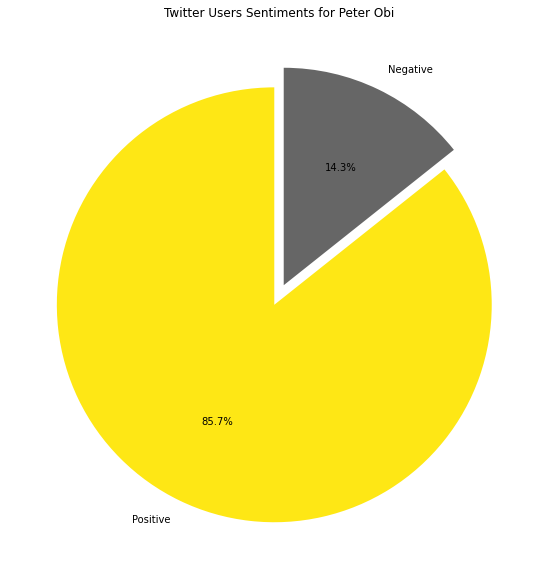

In [24]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(data, labels=['Positive', 'Negative'], colors=['#FEE715', '#666666'], startangle=90, explode= [0.05, 0.05], autopct='%1.1f%%');
plt.title('Twitter Users Sentiments for Bola Ahmed');

### Peter Obi

In [6]:
obi_df['hashtags']=obi_df['tweet'].apply(getHashtags)
obi_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags
0,0,1585927762170109952,AKD205036451,2022-10-28 09:33:38+00:00,"from:AKD205036451 As at today, I humbly advise...",NaN,0,0,16,92,False,Twitter for iPhone,
1,1,1585927310082916352,AellayMedaiyese,2022-10-28 09:31:50+00:00,"I called, you giving me attitude saying you ga...",Federal Capital Territory,0,0,6378,372,False,Twitter for iPhone,#abuja #jabilakemall #obidatti2023
2,2,1585926765528031232,valmoor70490991,2022-10-28 09:29:40+00:00,Operation pick your PVC \n\nI am at the IFO IN...,NaN,0,0,70,218,False,Twitter for Android,#obidientlyyusful #obidatti2023
3,3,1585925340014190592,JaypeeGeneral,2022-10-28 09:24:00+00:00,Kenneth Okonkwo is just too good abeg🔥🔥🔥 He wa...,NaN,6,9,8232,3399,False,Twitter for iPhone,#obidatti023 #obidatti2023
4,4,1585925140063346689,DesmondJameso2,2022-10-28 09:23:13+00:00,A country where graduates are turned into comm...,Nigeria,0,0,474,4906,False,Twitter for Android,#votewisely #obidatti2023 #abujatwittercommunity


In [7]:
# Store hashtags in a list
hashtags_list=obi_df['hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Importing Collection module to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts=Counter(hashtags)
hashtags_df=pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns=['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  1667


In [8]:
# Checking the hashtag dataframe for the top 10 hashtags used
hashtags_df.head(10)

,hashtags,count
2,#obidatti2023,2392
10,#obidients,1910
9,#obidient,871
11,#peterobi4president2023,430
3,#obidientlyyusful,416
4,#obidatti023,363
16,#endsars,344
23,#peterobiforpresident2023,201
70,#peterobi,192
24,#nigeria,175


In [24]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
obi_df['Processed_Tweets'] = obi_df['tweet'].apply(preprocessTweets)
obi_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,Processed_Tweets
0,0,1585927762170109952,AKD205036451,2022-10-28 09:33:38+00:00,"from:AKD205036451 As at today, I humbly advise...",NaN,0,0,16,92,False,Twitter for iPhone,,akd today humbly advise apc supporter give vot...
1,1,1585927310082916352,AellayMedaiyese,2022-10-28 09:31:50+00:00,"I called, you giving me attitude saying you ga...",Federal Capital Territory,0,0,6378,372,False,Twitter for iPhone,#abuja #jabilakemall #obidatti2023,called giving attitude saying gat mood swing m...
2,2,1585926765528031232,valmoor70490991,2022-10-28 09:29:40+00:00,Operation pick your PVC \n\nI am at the IFO IN...,NaN,0,0,70,218,False,Twitter for Android,#obidientlyyusful #obidatti2023,operation pick pvc ifo inec office pick pvc ol...
3,3,1585925340014190592,JaypeeGeneral,2022-10-28 09:24:00+00:00,Kenneth Okonkwo is just too good abeg🔥🔥🔥 He wa...,NaN,6,9,8232,3399,False,Twitter for iPhone,#obidatti023 #obidatti2023,kenneth okonkwo good abeg🔥🔥🔥 channel tv yester...
4,4,1585925140063346689,DesmondJameso2,2022-10-28 09:23:13+00:00,A country where graduates are turned into comm...,Nigeria,0,0,474,4906,False,Twitter for Android,#votewisely #obidatti2023 #abujatwittercommunity,country graduate turned common beggar yet grad...


### Sentiment Analysis

In [25]:
# Apply the polarity and sentiment functions to respective columns
obi_df['Polarity']=obi_df['Processed_Tweets'].apply(getPolarity)
obi_df['Sentiment']=obi_df['Polarity'].apply(getSentimentTextBlob)

In [26]:
obi_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,Processed_Tweets,Polarity,Sentiment
0,0,1585927762170109952,AKD205036451,2022-10-28 09:33:38+00:00,"from:AKD205036451 As at today, I humbly advise...",NaN,0,0,16,92,False,Twitter for iPhone,,akd today humbly advise apc supporter give vot...,-0.200000,Negative
1,1,1585927310082916352,AellayMedaiyese,2022-10-28 09:31:50+00:00,"I called, you giving me attitude saying you ga...",Federal Capital Territory,0,0,6378,372,False,Twitter for iPhone,#abuja #jabilakemall #obidatti2023,called giving attitude saying gat mood swing m...,0.000000,Positive
2,2,1585926765528031232,valmoor70490991,2022-10-28 09:29:40+00:00,Operation pick your PVC \n\nI am at the IFO IN...,NaN,0,0,70,218,False,Twitter for Android,#obidientlyyusful #obidatti2023,operation pick pvc ifo inec office pick pvc ol...,0.300000,Positive
3,3,1585925340014190592,JaypeeGeneral,2022-10-28 09:24:00+00:00,Kenneth Okonkwo is just too good abeg🔥🔥🔥 He wa...,NaN,6,9,8232,3399,False,Twitter for iPhone,#obidatti023 #obidatti2023,kenneth okonkwo good abeg🔥🔥🔥 channel tv yester...,0.350000,Positive
4,4,1585925140063346689,DesmondJameso2,2022-10-28 09:23:13+00:00,A country where graduates are turned into comm...,Nigeria,0,0,474,4906,False,Twitter for Android,#votewisely #obidatti2023 #abujatwittercommunity,country graduate turned common beggar yet grad...,0.216667,Positive


In [27]:
obi_df['Sentiment'].value_counts()

Positive    4012
Negative     719
Name: Sentiment, dtype: int64

In [29]:
data=obi_df['Sentiment'].value_counts()

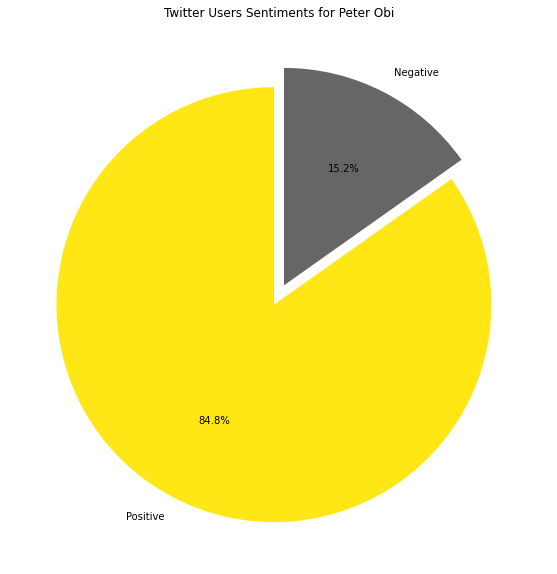

In [30]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(data, labels=['Positive', 'Negative'], colors=['#FEE715', '#666666'], startangle=90, explode= [0.05, 0.05], autopct='%1.1f%%');
plt.title('Twitter Users Sentiments for Peter Obi');